In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')

In [4]:
data = pd.read_csv(r'C:\Users\kuncham srikanth\Downloads\cubic_zirconia.csv\cubic_zirconia.csv')

In [5]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [6]:
data.shape

(26967, 11)

In [7]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [8]:
data = data.iloc[:,1:]

In [9]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [11]:
data.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [14]:
data_dtype = data.dtypes
data_missing = data.isnull().mean().round(4)*100
data_desc = data.describe(include ='all')
dtls_1= pd.DataFrame(data_missing, columns = ['missing'])
dtls_2= pd.DataFrame(data_dtype, columns=['dtype'])
dtls_3= pd.DataFrame(data_desc)
dtls_3= dtls_3.T
dtls= pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending = False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
depth,2.58,float64,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
carat,0.00,float64,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,0.00,object,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,0.00,object,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,0.00,object,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table,0.00,float64,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,0.00,float64,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,0.00,float64,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,0.00,float64,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,0.00,int64,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


# EDA(Exploratory Data Analysis

In [15]:
data['depth'].fillna(data['depth'].mean(), inplace = True)

In [17]:
data.drop_duplicates(inplace = True)

In [19]:
print(f'after removing duplicatess{data.shape}')

after removing duplicatess(26933, 10)


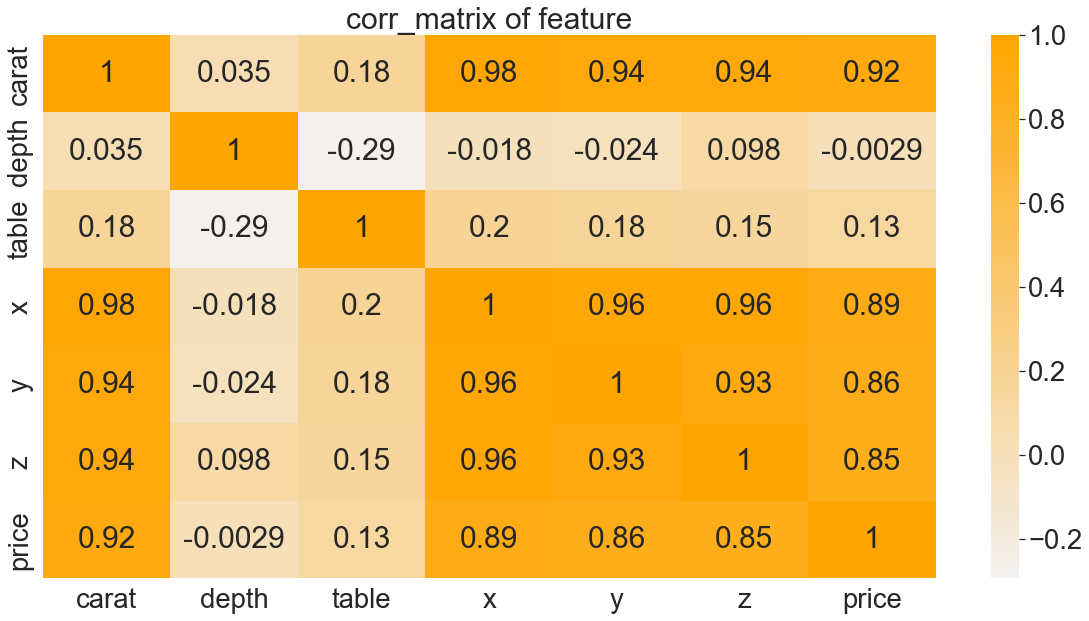

In [21]:
corr_matrix = data.corr()
plt.figure(figsize = (20,10))
sns.set(font_scale= 2.5)
cmap= sns.light_palette("orange",as_cmap=True)
sns.heatmap(corr_matrix, cmap = cmap, annot =True)
plt.title("corr_matrix of feature")
plt.show()

# Univariate Analysis

C:\Users\kuncham srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


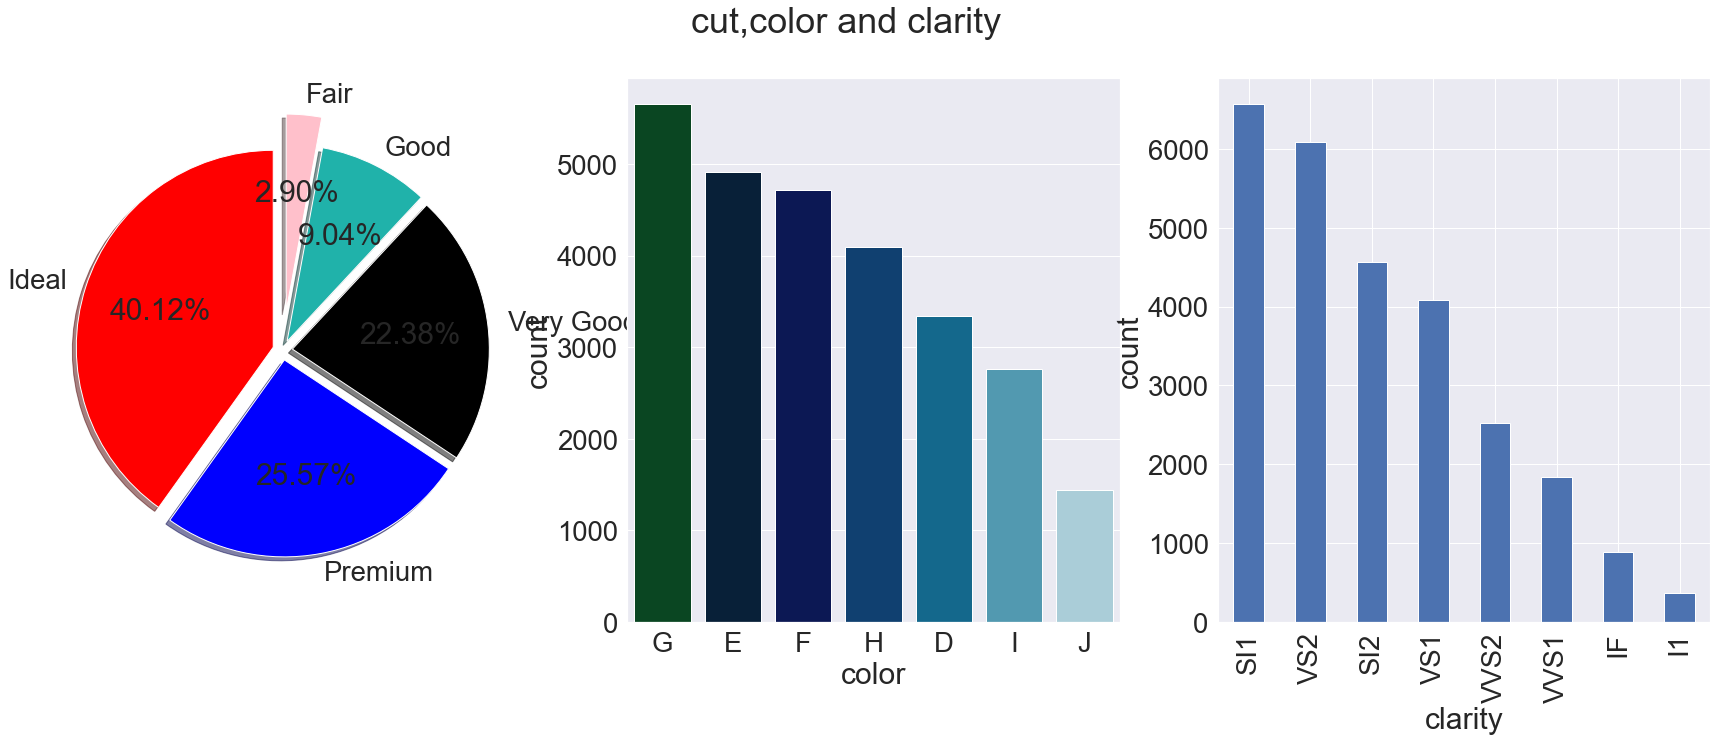

In [41]:
plt.rcParams['figure.figsize'] = 30,10
plt.subplot(131)
plt.pie(data['cut'].value_counts().values,labels=data['cut'].value_counts().index,startangle=90,
       colors=['red','blue','black','lightseagreen','pink'],
       explode = [0.05,0.05,0.05,0.05,0.2],
       shadow = True, autopct = '%1.2f%%')
plt.subplot(132)
sns.countplot(data['color'],palette = 'ocean',order = data['color'].value_counts().index)
plt.subplot(133)
data['clarity'].value_counts().plot.bar()
plt.xlabel('clarity')
plt.ylabel('count')
plt.suptitle('cut,color and clarity')
plt.show()

C:\Users\kuncham srikanth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kuncham srikanth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kuncham srikanth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

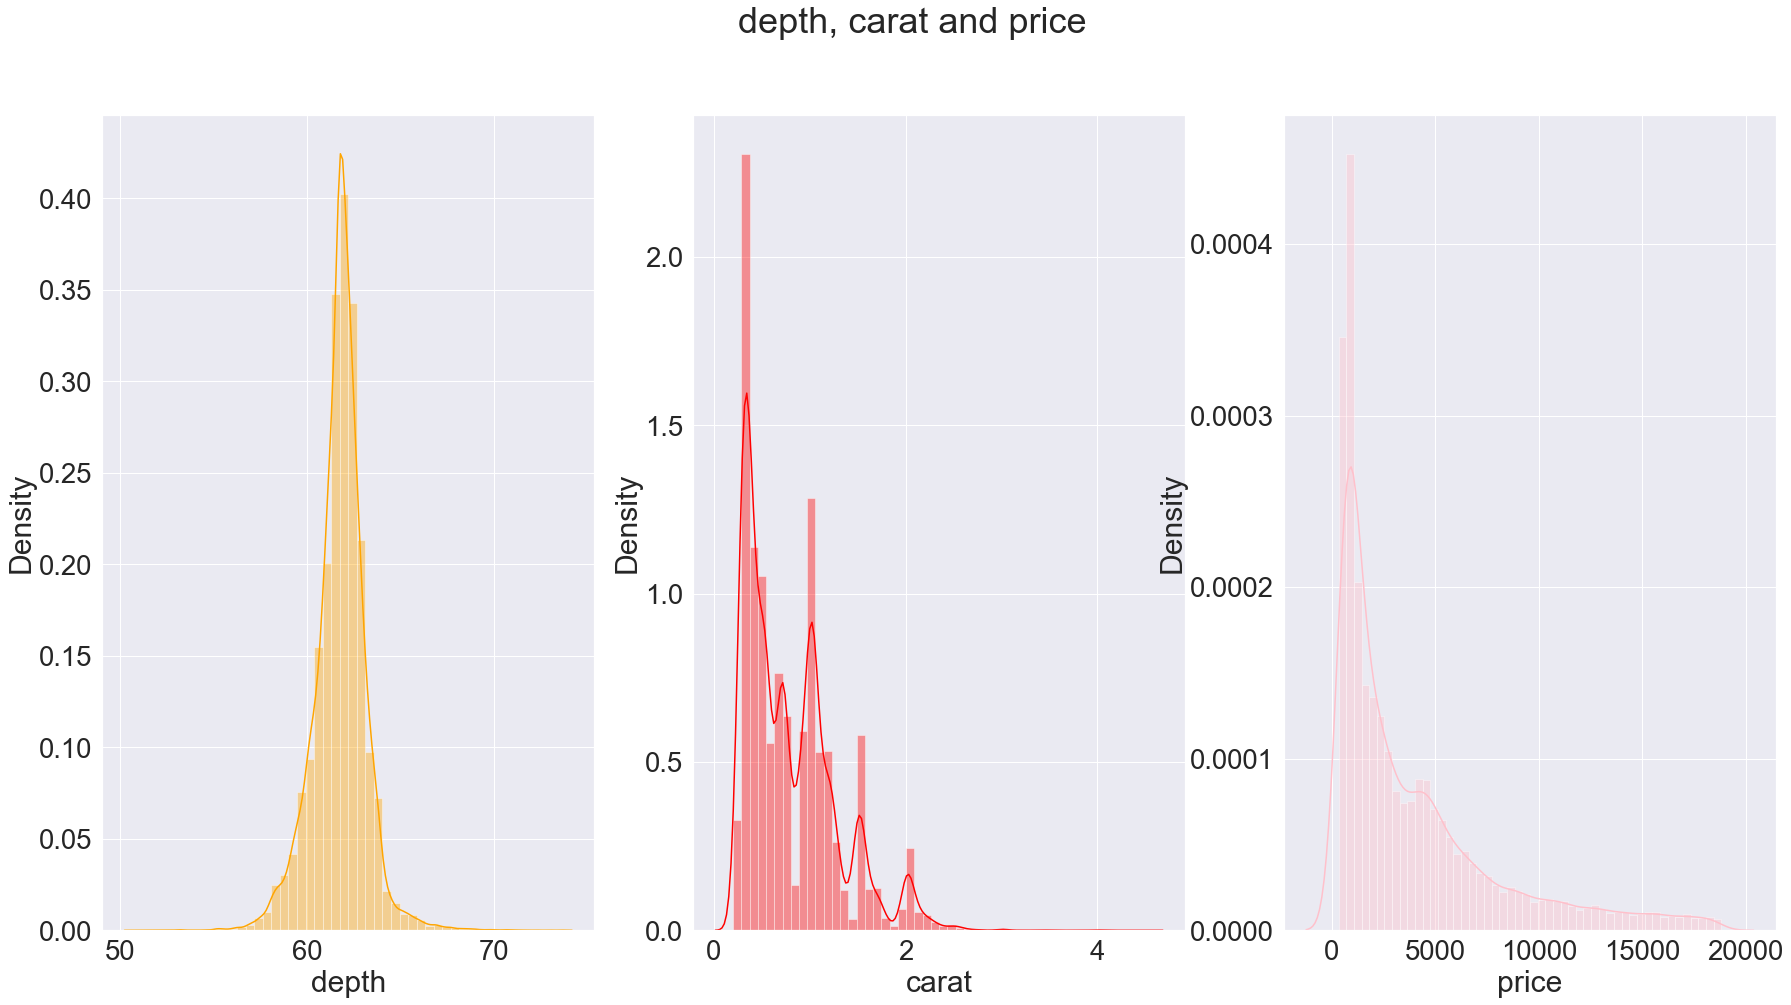

In [31]:
plt.rcParams['figure.figsize']= 30,15
plt.subplot(131)
sns.distplot(data['depth'],color = 'orange')
plt.subplot(132)
sns.distplot(data['carat'], color ='red')
plt.subplot(133)
sns.distplot(data['price'], color = 'pink')
plt.suptitle('depth, carat and price')
plt.show()

C:\Users\kuncham srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kuncham srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kuncham srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

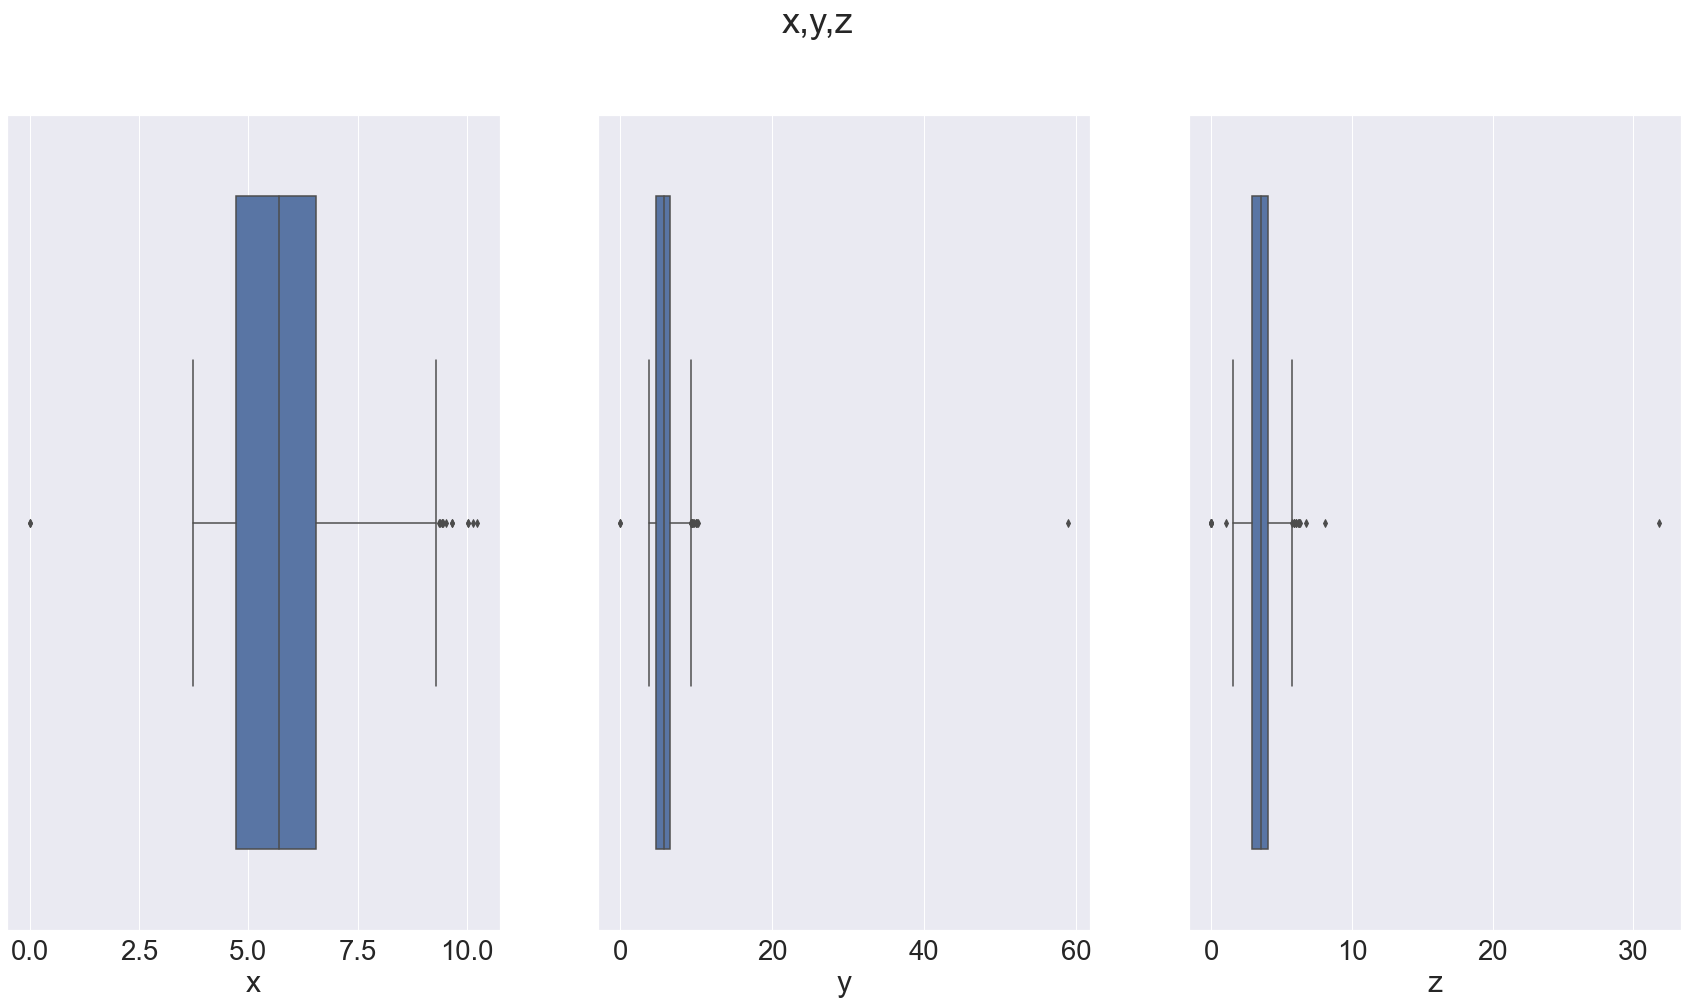

In [32]:
plt.rcParams['figure.figsize']= 30,15
plt.subplot(131)
sns.boxplot(data['x'])
plt.subplot(132)
sns.boxplot(data['y'])
plt.subplot(133)
sns.boxplot(data['z'])
plt.suptitle('x,y,z')
plt.show()

# Multivariate Analysis

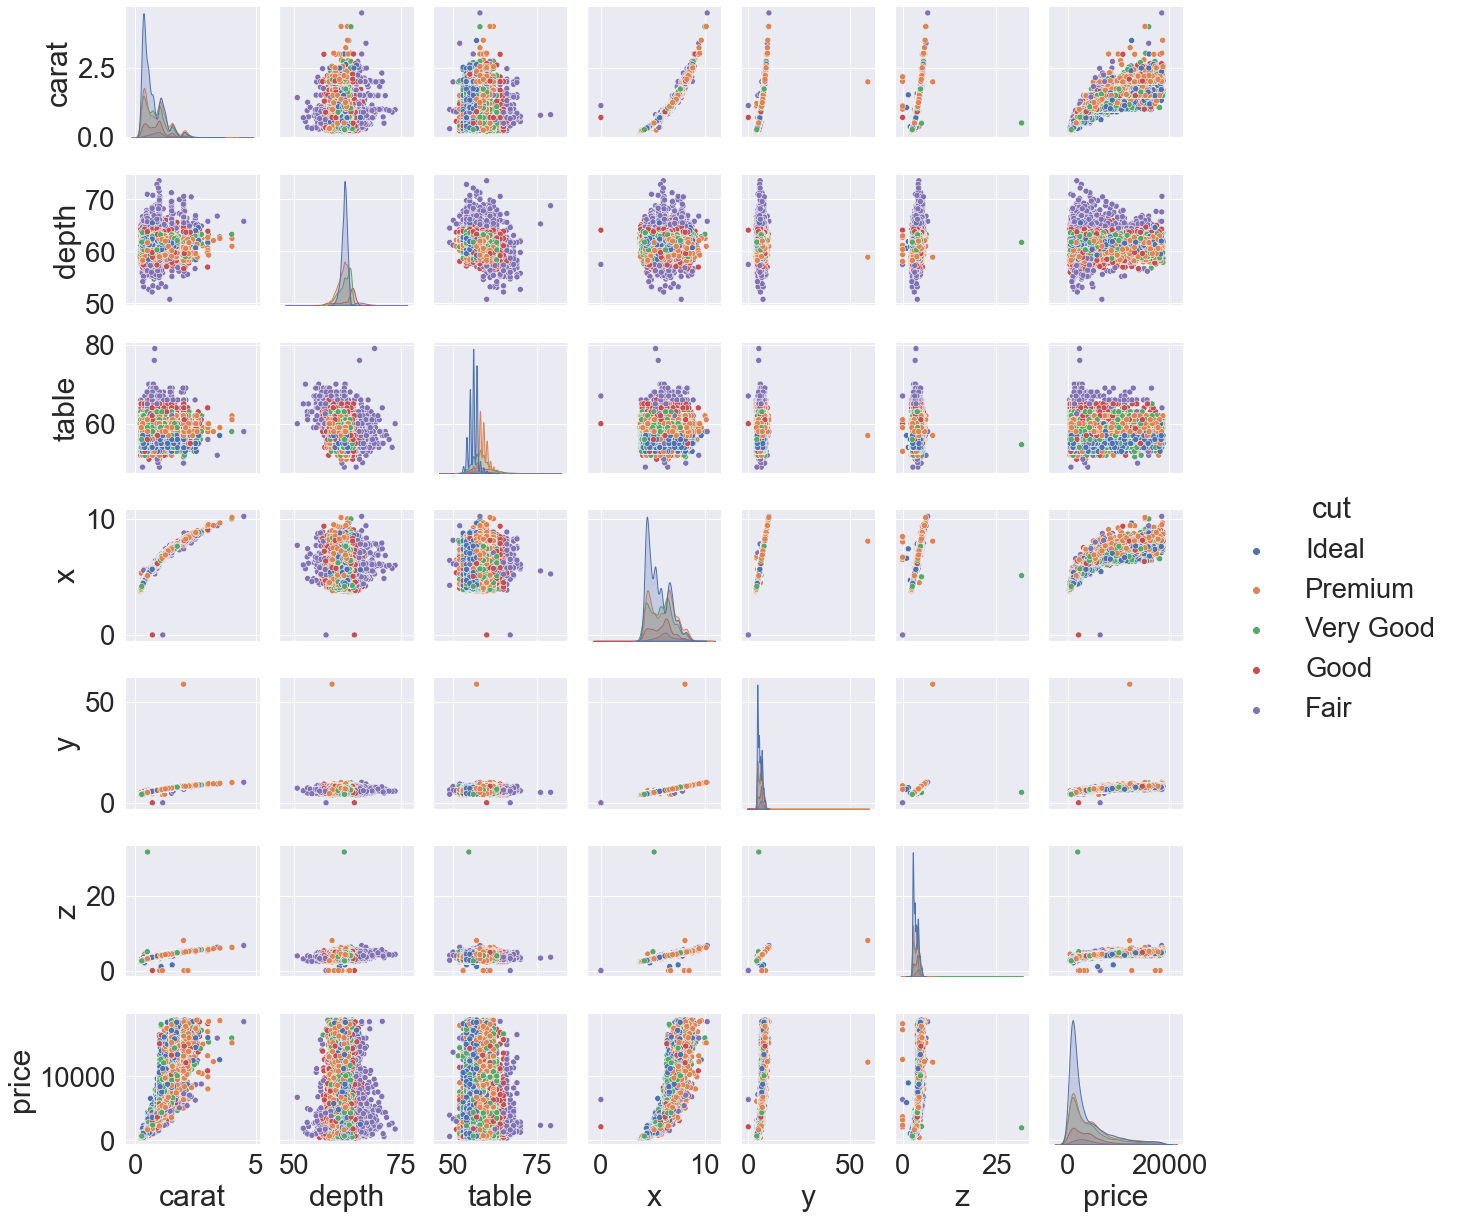

In [33]:
sns.pairplot(data, hue = 'cut')
plt.show()

C:\Users\kuncham srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


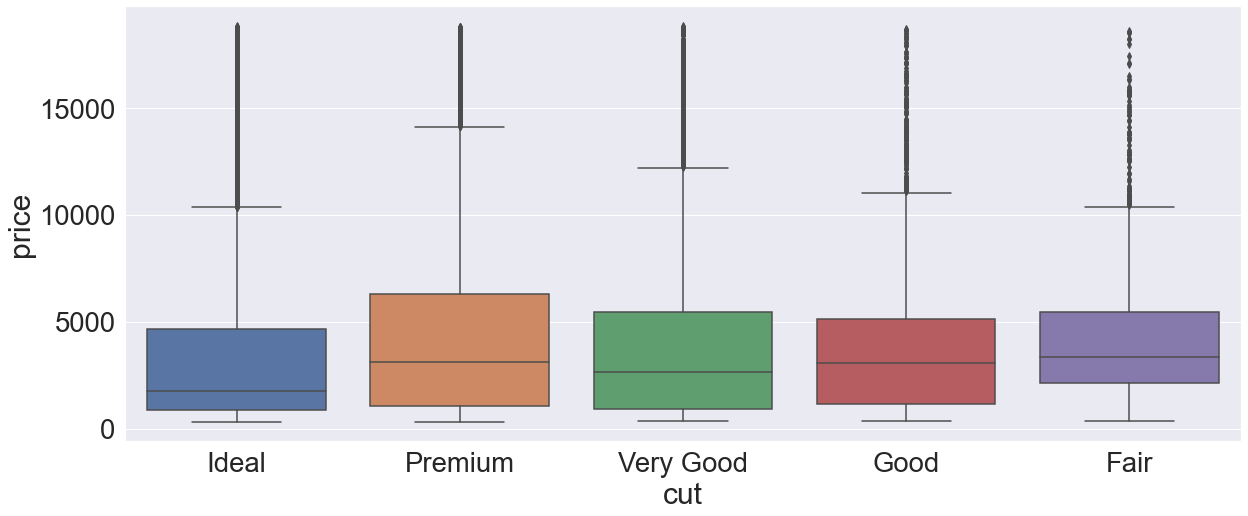

In [34]:
plt.figure(figsize = (20,8))
sns.boxplot(data['cut'],data['price'])
plt.show()

C:\Users\kuncham srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


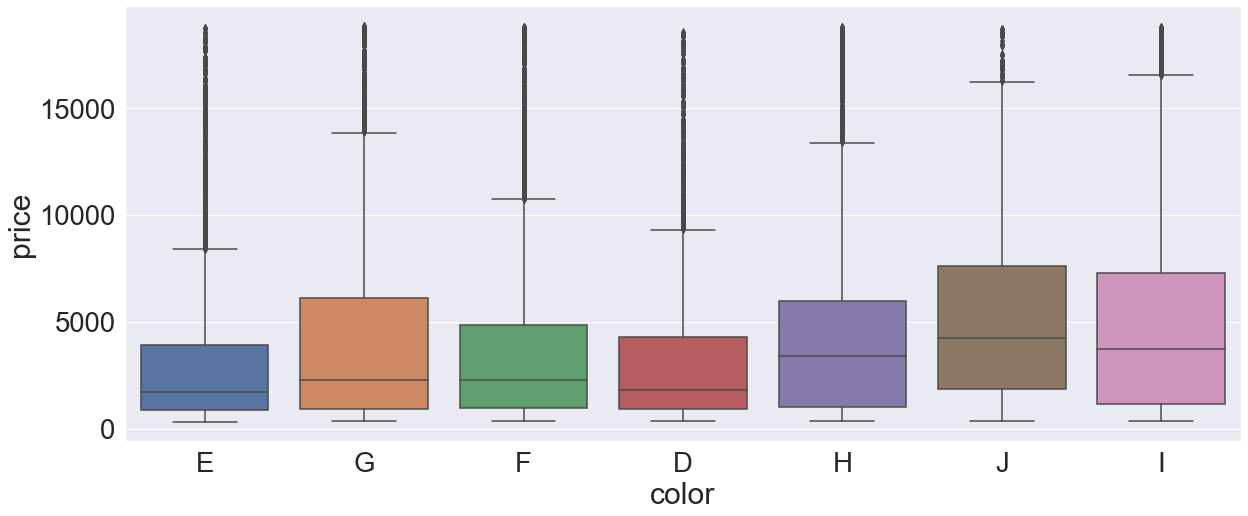

In [35]:
plt.figure(figsize = (20,8))
sns.boxplot(data['color'],data['price'])
plt.show()

C:\Users\kuncham srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


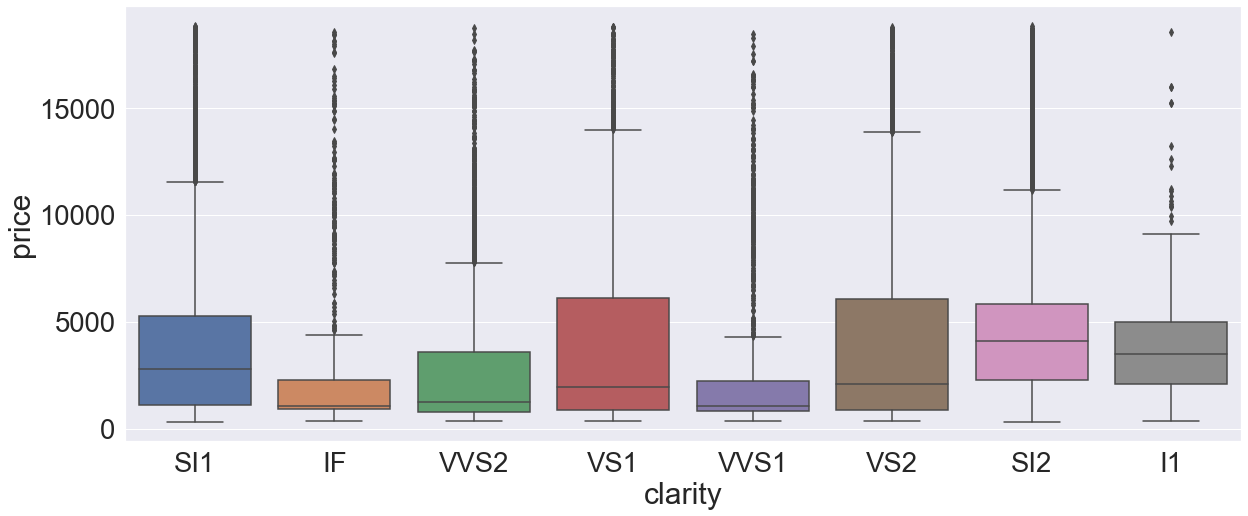

In [36]:
plt.figure(figsize = (20,8))
sns.boxplot(data['clarity'], data['price'])
plt.show()

In [37]:
data[['price','cut']].groupby(['cut']).agg(['min','mean','max']).style.background_gradient(cmap='summer')

In [39]:
data[['price','color']].groupby(['color']).agg(['min','mean','max']).style.background_gradient(cmap='summer')

In [40]:
data[['price','clarity']].groupby(['clarity']).agg(['min','mean','max']).style.background_gradient(cmap='summer')